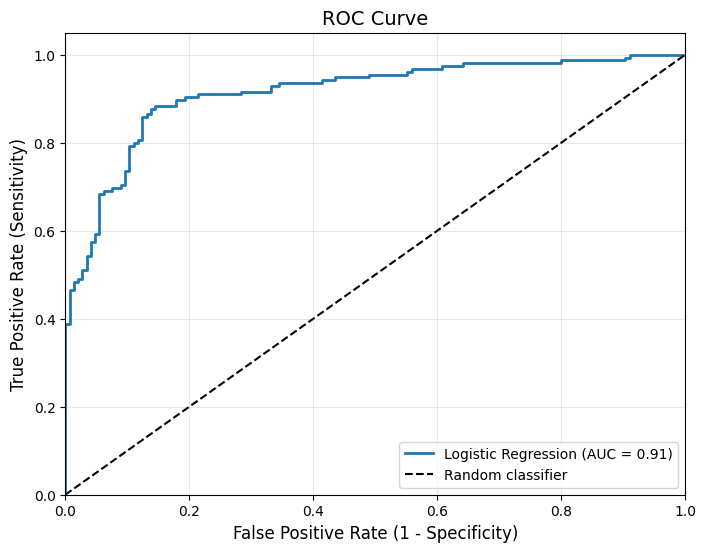

Threshold   TPR    FPR
inf      0.000   0.000
0.87      0.574   0.041
0.60      0.794   0.103
0.35      0.897   0.179
0.14      0.948   0.434
0.01      0.994   0.903


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           random_state=42)

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# 3. Train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict probabilities on the test set
#    (we need the probability of the positive class, usually class 1)
y_scores = model.predict_proba(X_test)[:, 1]

# 5. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

# 6. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Optional: Print a few thresholds and corresponding TPR/FPR
print("Threshold   TPR    FPR")
for i in range(0, len(thresholds), len(thresholds)//5):  # sample 5 points
    print(f"{thresholds[i]:.2f}      {tpr[i]:.3f}   {fpr[i]:.3f}")